In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../dataset/dataset_train.csv")
houses = list(set(data["Hogwarts House"]))
courses = data.columns[6:]

print(houses)
print(courses, len(courses))

['Slytherin', 'Hufflepuff', 'Ravenclaw', 'Gryffindor']
Index(['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object') 13


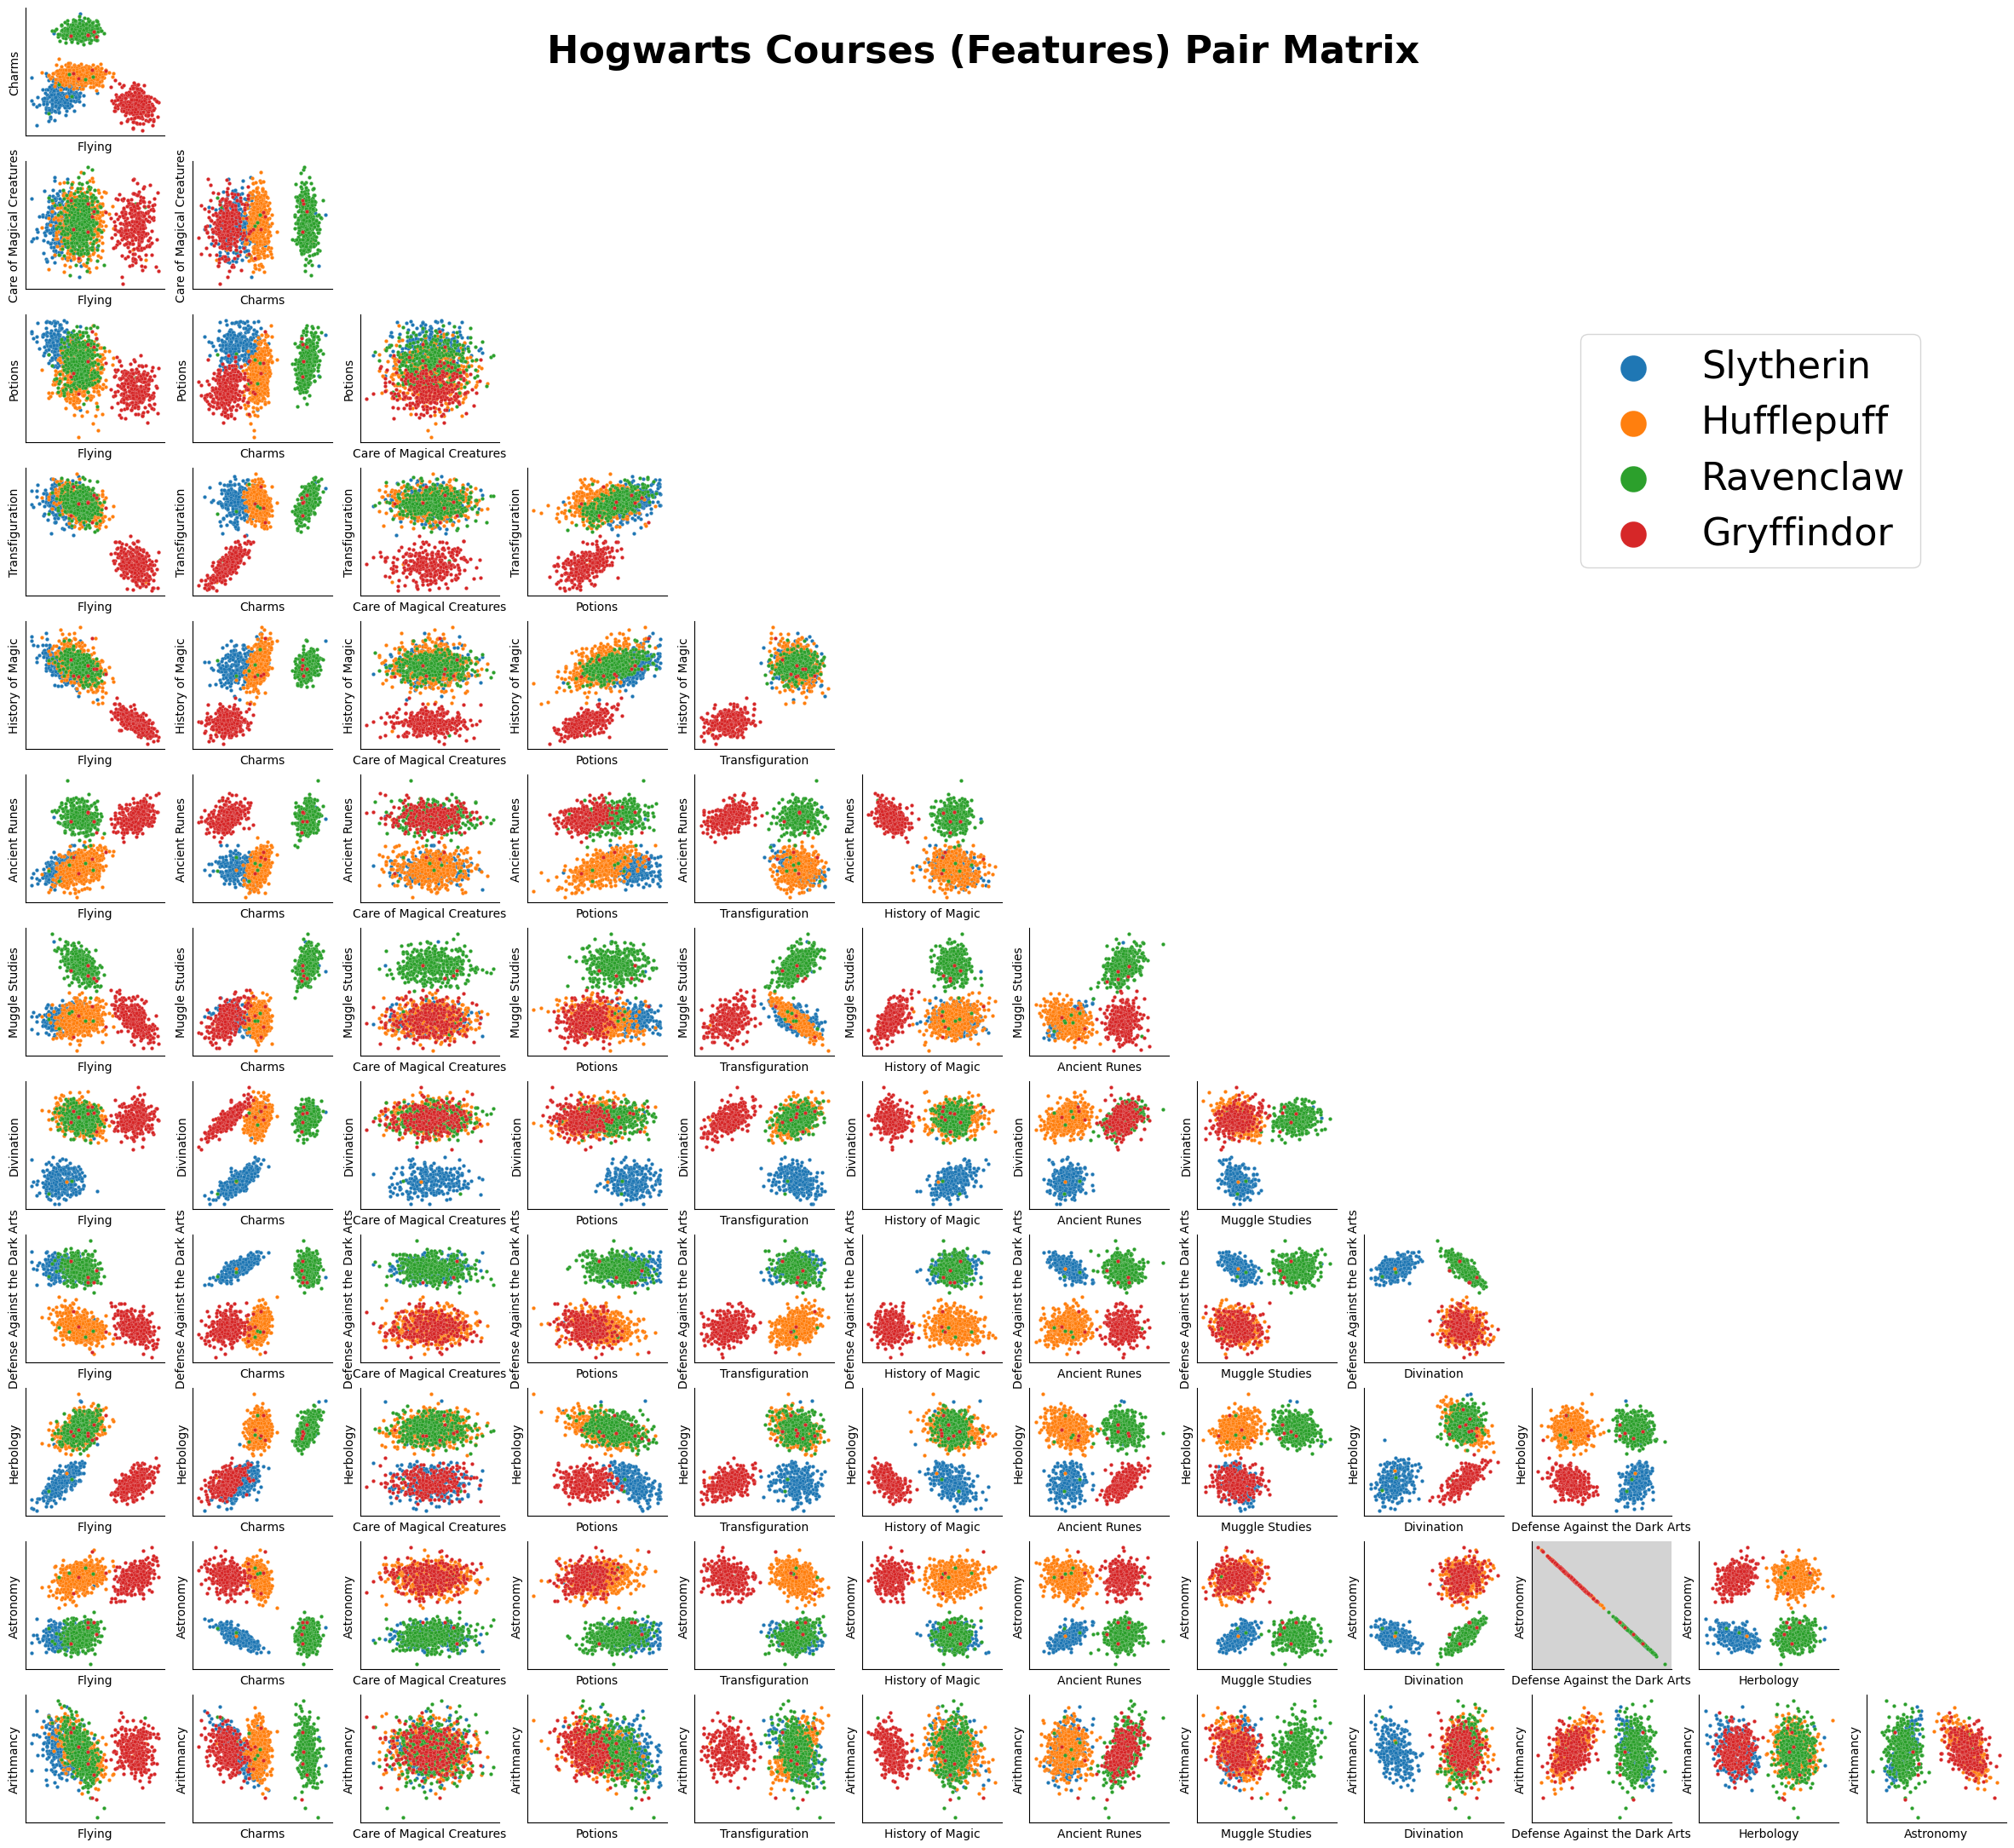

In [7]:
fig, ax = plt.subplots(13, 12, figsize=(30, 30))

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i in range(13):
    for j in range(i + 1, 13):
        
        for id, h in enumerate(houses):
            x = np.array(data[data["Hogwarts House"] == h][courses[j]])
            y = np.array(data[data["Hogwarts House"] == h][courses[i]])
            
            ax[12 - i, 12 - j].scatter(x, y,
                s=10,
                c=color[id],
                edgecolor="white",
                linewidths=0.1,
                label=h
                )
            
            ax[12 - i, 12 - j].set_xlabel(courses[j])
            ax[12 - i, 12 - j].set_ylabel(courses[i])

        # Remove ticks & spline
        ax[12 - i, 12 - j].set_xticks([])
        ax[12 - i, 12 - j].set_yticks([])
        ax[12 - i, 12 - j].spines['top'].set_visible(False)
        ax[12 - i, 12 - j].spines['right'].set_visible(False)

        

# Hide upper triangle and diagonal
for i in range(13):
    for j in range(i, 12):
        fig.delaxes(ax[i, j])

handles, labels = ax[12, 10].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', 
           bbox_to_anchor=(0.8, 0.7), 
           fontsize=32, ncol=1, markerscale=7)
fig.suptitle('Hogwarts Courses (Features) Pair Matrix', 
             fontsize=32, fontweight='bold', y=0.81)

ax[11,9].patch.set_facecolor('lightgray')

Question: What are the two Hogwarts courses that are similar 

Find courses pair with:
- Strong linear correlation
- Similar distributions or ranges
- One feature predicts the other well

Answer: Astronomy & Defense Against the Dark Arts